In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv("winter.csv")

In [3]:
df.head()

,Year,City,Sport,Discipline,Country,Gender,Event,Medal,Athlete
0,1924,Chamonix,Biathlon,Biathlon,FIN,Men,Military Patrol,Silver,FIN
1,1924,Chamonix,Biathlon,Biathlon,FRA,Men,Military Patrol,Bronze,FRA
2,1924,Chamonix,Biathlon,Biathlon,SUI,Men,Military Patrol,Gold,SUI
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,Men,Four-Man,Bronze,BEL
4,1924,Chamonix,Bobsleigh,Bobsleigh,GBR,Men,Four-Man,Silver,GBR


In [4]:
df.tail()

,Year,City,Sport,Discipline,Country,Gender,Event,Medal,Athlete
3269,2018,PyeongChang,Speed Skating,Speed Skating,KOR,Women,Mass Start,Silver,Kim Bo-Reum
3270,2018,PyeongChang,Speed Skating,Speed Skating,NED,Women,Mass Start,Bronze,Irene Schouten
3271,2018,PyeongChang,Speed Skating,Speed Skating,JPN,Women,Team Pursuit (6 laps),Gold,Japan
3272,2018,PyeongChang,Speed Skating,Speed Skating,NED,Women,Team Pursuit (6 laps),Silver,Netherlands
3273,2018,PyeongChang,Speed Skating,Speed Skating,USA,Women,Team Pursuit (6 laps),Bronze,United States


In [5]:
df.shape

(3274, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3274 entries, 0 to 3273
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        3274 non-null   int64 
 1   City        3274 non-null   object
 2   Sport       3274 non-null   object
 3   Discipline  3274 non-null   object
 4   Country     3274 non-null   object
 5   Gender      3274 non-null   object
 6   Event       3274 non-null   object
 7   Medal       3274 non-null   object
 8   Athlete     3274 non-null   object
dtypes: int64(1), object(8)
memory usage: 230.3+ KB


In [7]:
df.describe()

,Year
count,3274.000000
mean,1989.351252
std,24.275321
min,1924.000000
25%,1976.000000
50%,1994.000000
75%,2010.000000
max,2018.000000


In [8]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Country       0
Gender        0
Event         0
Medal         0
Athlete       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.Year.value_counts()

2014    310
2018    307
2010    264
2006    258
2002    239
1998    211
1994    189
1992    177
1988    144
1984    123
1980    121
1976    117
1972    108
1968    107
1964    107
1960     84
1956     74
1952     70
1948     69
1936     54
1924     52
1932     45
1928     44
Name: Year, dtype: int64

In [11]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Country', 'Gender', 'Event',
       'Medal', 'Athlete'],
      dtype='object')

In [12]:
df.City.value_counts()

Sochi                     310
PyeongChang               307
Vancouver                 264
Turin                     258
Salt Lake City            239
Innsbruck                 224
Nagano                    211
Lillehammer               189
Albertville               177
Lake Placid               166
Calgary                   144
Sarajevo                  123
St.Moritz                 113
Sapporo                   108
Grenoble                  107
Squaw Valley               84
Cortina d'Ampezzo          74
Oslo                       70
Garmisch Partenkirchen     54
Chamonix                   52
Name: City, dtype: int64

In [13]:
df.Sport.value_counts()

Skiing            1447
Skating           1028
Biathlon           261
Bobsleigh          178
Luge               144
Ice Hockey          87
Curling             42
Speed Skating       42
Snowboarding        30
Figure Skating      15
Name: Sport, dtype: int64

In [14]:
df.Discipline.value_counts()

Speed skating                522
Cross Country Skiing         507
Alpine Skiing                460
Figure skating               338
Biathlon                     261
Short Track Speed Skating    168
Ski Jumping                  147
Luge                         144
Bobsleigh                    142
Freestyle Skiing             132
Nordic Combined              111
Snowboard                     90
Ice Hockey                    87
Speed Skating                 42
Curling                       42
Skeleton                      36
Snowboarding                  30
Figure Skating                15
Name: Discipline, dtype: int64

In [16]:
df.Gender.value_counts()

Men      1962
Women    1285
Mixed      21
Open        6
Name: Gender, dtype: int64

In [17]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Country', 'Gender', 'Event',
       'Medal', 'Athlete'],
      dtype='object')

In [18]:
df.Medal.value_counts()

Gold      1097
Silver    1092
Bronze    1085
Name: Medal, dtype: int64

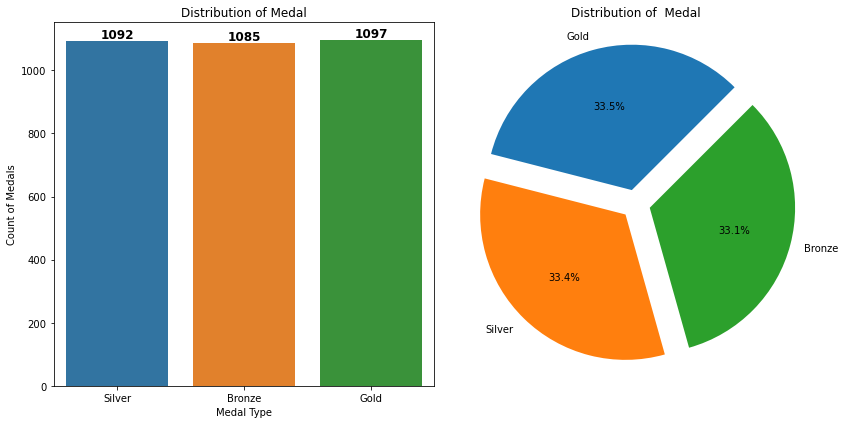

In [19]:
# with seaborn
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
ax = sns.countplot(x='Medal', data=df)
plt.title('Distribution of Medal')
plt.xlabel('Medal Type')
plt.ylabel('Count of Medals')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.Medal.value_counts(), labels = df.Medal.value_counts().index, autopct = '%1.1f%%', startangle = 45,explode=[0.1,0.1,0.1])
plt.title('Distribution of  Medal')
plt.tight_layout()
plt.show()

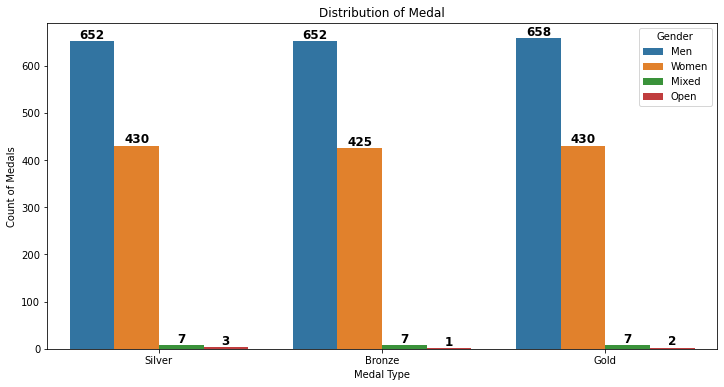

In [20]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Medal', data=df, hue="Gender")
plt.title('Distribution of Medal')
plt.xlabel('Medal Type')
plt.ylabel('Count of Medals')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[2], fontsize=12, color='black', fontweight='bold')
ax.bar_label(ax.containers[3], fontsize=12, color='black', fontweight='bold')
plt.show()

In [21]:
country_medals = df[["Country","Medal"]].groupby("Country").count().sort_values(by="Medal", ascending=False)
country_medals.head(20)

,Medal
Country,
NOR,368
USA,313
GER,238
AUT,237
URS,212
CAN,210
FIN,168
SWE,158
SUI,152


<AxesSubplot:title={'center':'Distribution of Medals by Country'}, xlabel='Country'>

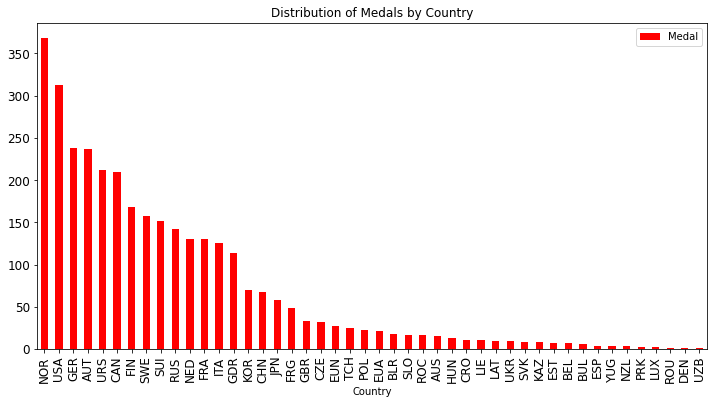

In [22]:

country_medals.plot(kind="bar", figsize=(12,6), title="Distribution of Medals by Country", legend=True, fontsize=12, color="red",grid=False)

In [23]:
medal_yearwise = df.groupby("Year")["Medal"].count().sort_values(ascending=False)
medal_yearwise.head(20)

Year
2014    310
2018    307
2010    264
2006    258
2002    239
1998    211
1994    189
1992    177
1988    144
1984    123
1980    121
1976    117
1972    108
1968    107
1964    107
1960     84
1956     74
1952     70
1948     69
1936     54
Name: Medal, dtype: int64

<AxesSubplot:title={'center':'Distribution of Medals by Year'}, xlabel='Year'>

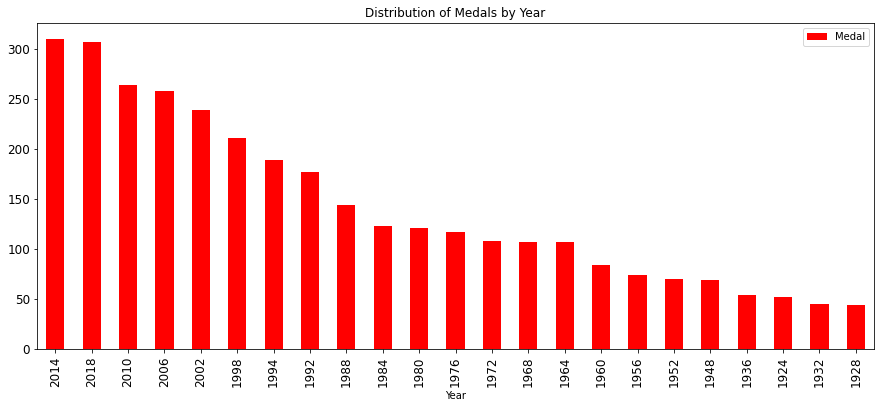

In [24]:
medal_yearwise.plot(kind="bar", figsize=(15,6), title="Distribution of Medals by Year", legend=True, fontsize=12, color="red")

In [25]:
import plotly.express as px

In [26]:
gold_medals = df[df["Medal"]=="Gold"].groupby("Country").count().sort_values(by="Medal", ascending=False).reset_index()
line_colors =["red","blue","green","yellow","orange"]
gold_medal_plot = px.pie(gold_medals.head(5), values="Medal", names="Country", title="Top 5 Gold Winning Nations", hole = 0.6,color="Country", color_discrete_sequence=line_colors)
gold_medal_plot.show()

In [27]:
silver_medals = df[df["Medal"]=="Silver"].groupby("Country").count().sort_values(by="Medal", ascending=False).reset_index()
line_colors =["red","blue","green","yellow","orange"]
silver_medal_plot = px.pie(silver_medals.head(5), values="Medal", title="Top 5 Silver Medals by Country", hole = 0.6,color="Country", names = "Country", color_discrete_sequence=line_colors)
silver_medal_plot.show()

In [28]:
bronze_medals = df[df["Medal"]=="Bronze"].groupby("Country").count().sort_values(by="Medal", ascending=False).reset_index()
line_colors =["red","blue","green","yellow","orange"]
bronze_medal_plot = px.pie(bronze_medals.head(5), values="Medal", title="Top 5 Bronze Medals by Country", hole = 0.6,color="Country", names = "Country", color_discrete_sequence=line_colors, )
bronze_medal_plot.show()

In [29]:
yearly_medal = df.groupby("Year")["Medal"].count().sort_values(ascending=False).reset_index()
yearly_medal_plot = px.bar(yearly_medal, x="Year", y="Medal", title="Distribution of Medals by Year", color="Medal")
yearly_medal_plot.show()

In [30]:
yearly_medal=df.groupby('Year')['Medal'].value_counts()
yearly_medal


Year  Medal 
1924  Bronze     18
      Gold       17
      Silver     17
1928  Bronze     16
      Gold       15
               ... 
2014  Gold      104
      Silver    102
2018  Gold      103
      Bronze    102
      Silver    102
Name: Medal, Length: 69, dtype: int64

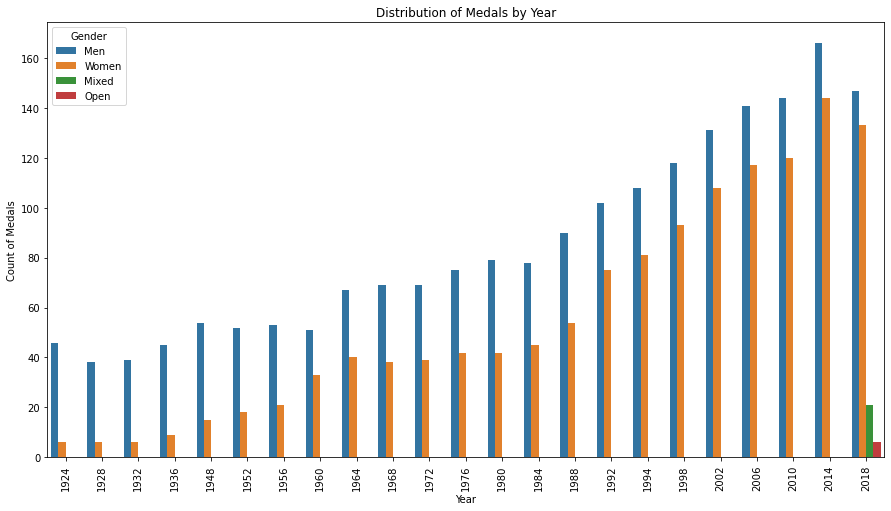

In [66]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Year', data=df, hue="Gender")
plt.title('Distribution of Medals by Year')
plt.xlabel('Year')
plt.ylabel('Count of Medals')
plt.xticks(rotation = 90)
plt.show()

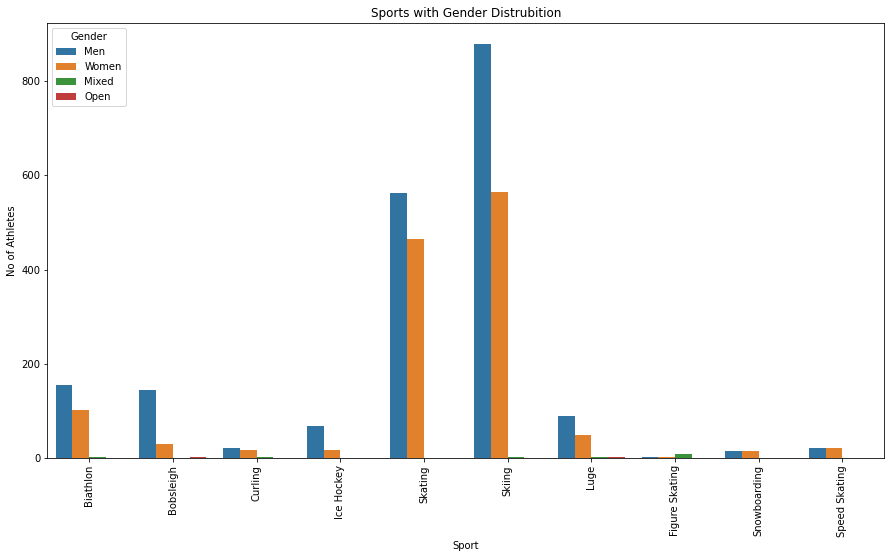

In [67]:
plt.figure(figsize=(15,8))
sport_by_gender = df.Sport.value_counts().index
sns.countplot(x = "Sport", hue = "Gender", data = df)
plt.xticks(rotation=90)
plt.title("Sports with Gender Distrubition")
plt.xlabel("Sport")
plt.ylabel("No of Athletes")
plt.show()

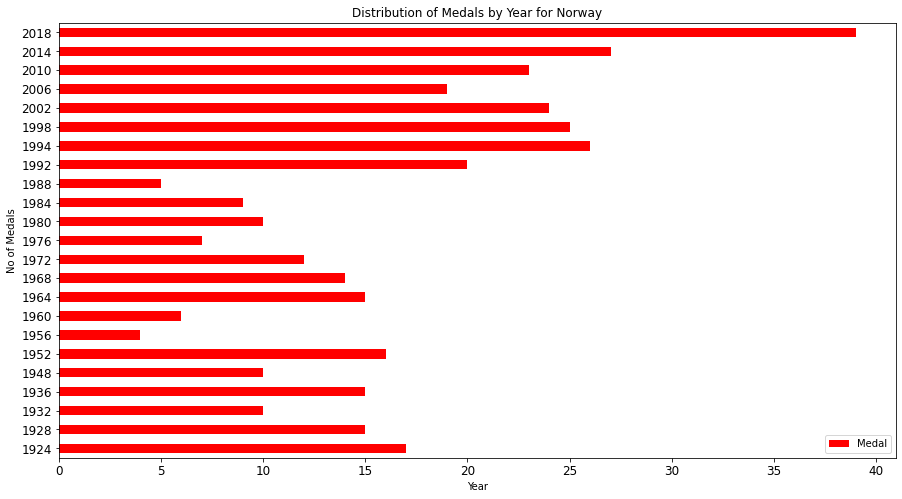

In [68]:
norway_country = df[df["Country"]=="NOR"]
norway_medals = norway_country.groupby("Year")["Medal"].count()
norway_medals.plot(kind = "barh", figsize=(15,8), title="Distribution of Medals by Year for Norway", legend=True, fontsize=12, color="red")
plt.xlabel("Year")
plt.ylabel("No of Medals")
plt.show()

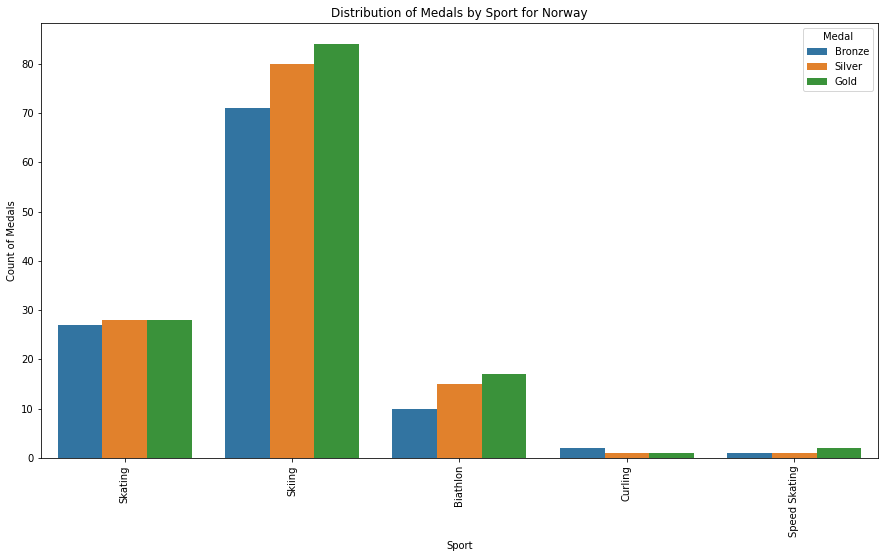

In [69]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Sport', data=norway_country, hue="Medal")
plt.title('Distribution of Medals by Sport for Norway')
plt.xlabel('Sport')
plt.ylabel('Count of Medals')
plt.xticks(rotation = 90)
plt.show()


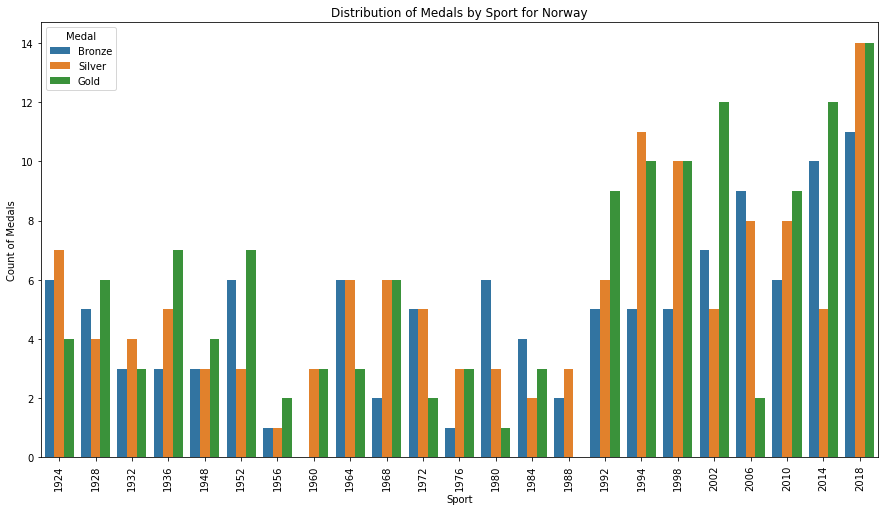

In [70]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Year', data=norway_country, hue="Medal")
plt.title('Distribution of Medals by Sport for Norway')
plt.xlabel('Sport')
plt.ylabel('Count of Medals')
plt.xticks(rotation = 90)
plt.show()

In [46]:
country_joined = df.groupby("Year")["Country"].nunique().reset_index()
country_joined

,Year,Country
0,1924,10
1,1928,12
2,1932,10
3,1936,11
4,1948,13
5,1952,13
6,1956,13
7,1960,14
8,1964,14
9,1968,15


In [53]:
fig = px.histogram(country_joined, x="Year", y="Country", title="Distribution of Countries by Year", nbins=50)
fig.show()

In [55]:
disiplline_games = df.groupby("Year")["Discipline"].nunique().reset_index()
disiplline_games

,Year,Discipline
0,1924,9
1,1928,8
2,1932,7
3,1936,8
4,1948,9
5,1952,8
6,1956,8
7,1960,8
8,1964,10
9,1968,10


In [60]:
fig = px.histogram(disiplline_games, x="Year", y="Discipline", title="Distribution of Disciplines by Year", nbins=50)
fig.show()

In [61]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Country', 'Gender', 'Event',
       'Medal', 'Athlete'],
      dtype='object')